In [1]:
# using celldancer environment, python 3.7.6
# from https://guangyuwanglab2021.github.io/cellDancer_website/notebooks/case_study_gastrulation.html

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

In [2]:
cell_type_u_s_path='~/kzlinlab/data/gasturlation_erythroid/GastrulationErythroid_cell_type_u_s.csv'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


In [3]:
gene_list=['Smarca2', 'Rbms2', 'Myo1b', 'Hba-x', 'Yipf5', 'Skap1', 'Smim1', 'Nfkb1', 'Sulf2', 'Blvrb', 'Hbb-y', 'Coro2b', 'Yipf5', 'Phc2', 'Mllt3']

loss_df, cellDancer_df=cd.velocity(cell_type_u_s,\
                                   gene_list=gene_list,\
                                   permutation_ratio=0.125,\
                                   n_jobs=8)
cellDancer_df

Using /home/projects/kzlinlab/projects/veloUncertainty/git/cellDancer_velocity_2024-04-27 00-06-47 as the output path.
Arranging genes for parallel job.
14  genes were arranged to  2  portions.


,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Rbms2,0.038103,0.487043,0.036075,0.465511,0.019075,0.072630,0.265758,0.063194,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Rbms2,0.068753,0.475556,0.063721,0.474569,0.025291,0.073081,0.264805,0.063194,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Rbms2,0.047554,0.616871,0.044335,0.587504,0.017350,0.069651,0.267823,0.063194,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Rbms2,0.007280,0.306850,0.008928,0.283413,0.018062,0.076539,0.263122,0.063194,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Rbms2,0.050115,0.525755,0.046806,0.507668,0.020151,0.071801,0.266157,0.063194,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172601,12324,Smarca2,0.006268,0.013540,0.008323,0.014300,0.021040,0.137554,0.274898,0.071164,cell_139318,Erythroid3,8.032358,7.603037
172602,12325,Smarca2,0.011318,0.004068,0.012534,0.009087,0.022499,0.137459,0.274316,0.071164,cell_139321,Erythroid3,10.352904,6.446736
172603,12326,Smarca2,0.006760,0.015051,0.008719,0.015789,0.021087,0.137503,0.274937,0.071164,cell_139326,Erythroid3,9.464873,7.261099
172604,12327,Smarca2,0.000000,0.000000,0.003263,0.000000,0.020238,0.138108,0.274622,0.071164,cell_139327,Erythroid3,9.990495,7.243880


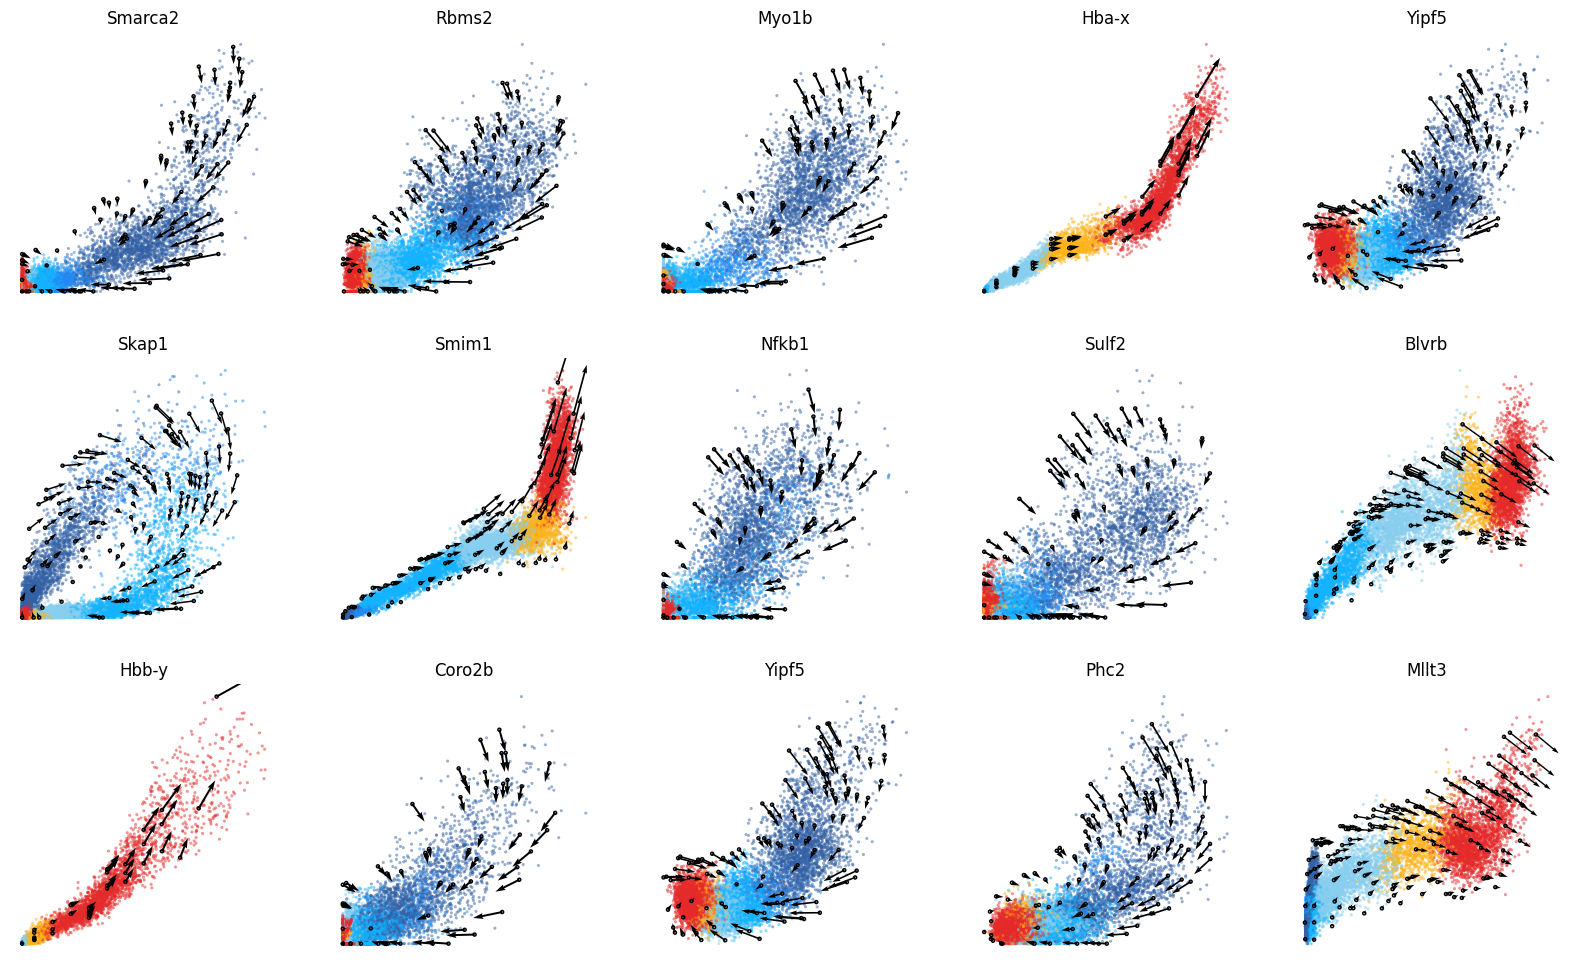

In [4]:
ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5,
        s = 5,
        velocity=True,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

Let's try it on all the genes

In [5]:
type(cellDancer_df)

pandas.core.frame.DataFrame

In [7]:
cell_type_u_s['gene_name'].nunique()

2000

In [8]:
loss_df_full, cellDancer_df_full=cd.velocity(cell_type_u_s,
                                   permutation_ratio=0.125,
                                   n_jobs=8)
cellDancer_df_full

Using /home/projects/kzlinlab/projects/veloUncertainty/git/cellDancer_velocity_2024-04-27 00-10-43 as the output path.
Arranging genes for parallel job.
2000  genes were arranged to  250  portions.


,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Tmeff1,0.051824,0.334659,0.048093,0.337689,0.009249,0.034869,0.183573,0.065081,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Tmeff1,0.019947,0.482091,0.018941,0.455556,0.007055,0.033123,0.184519,0.065081,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Tmeff1,0.032174,0.405435,0.030150,0.391764,0.008073,0.034083,0.183973,0.065081,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Tmeff1,0.014123,0.249297,0.013704,0.238461,0.009139,0.036179,0.182504,0.065081,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Tmeff1,0.079190,0.343350,0.073145,0.360223,0.009739,0.034453,0.183974,0.065081,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Slc7a6,0.006196,0.051459,0.006815,0.054982,0.030980,0.059863,0.109873,0.057475,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Slc7a6,0.000000,0.076729,0.001854,0.070685,0.028251,0.060026,0.110491,0.057475,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Slc7a6,0.011137,0.080449,0.010646,0.087625,0.031022,0.059548,0.110375,0.057475,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Slc7a6,0.018222,0.068457,0.016296,0.085100,0.033413,0.059318,0.110040,0.057475,cell_139327,Erythroid3,9.990495,7.243880


In [10]:
# compute cell velocity
cellDancer_df=cd.compute_cell_velocity(cellDancer_df=cellDancer_df, projection_neighbor_choice='gene', expression_scale='power10', projection_neighbor_size=10, speed_up=(100,100))

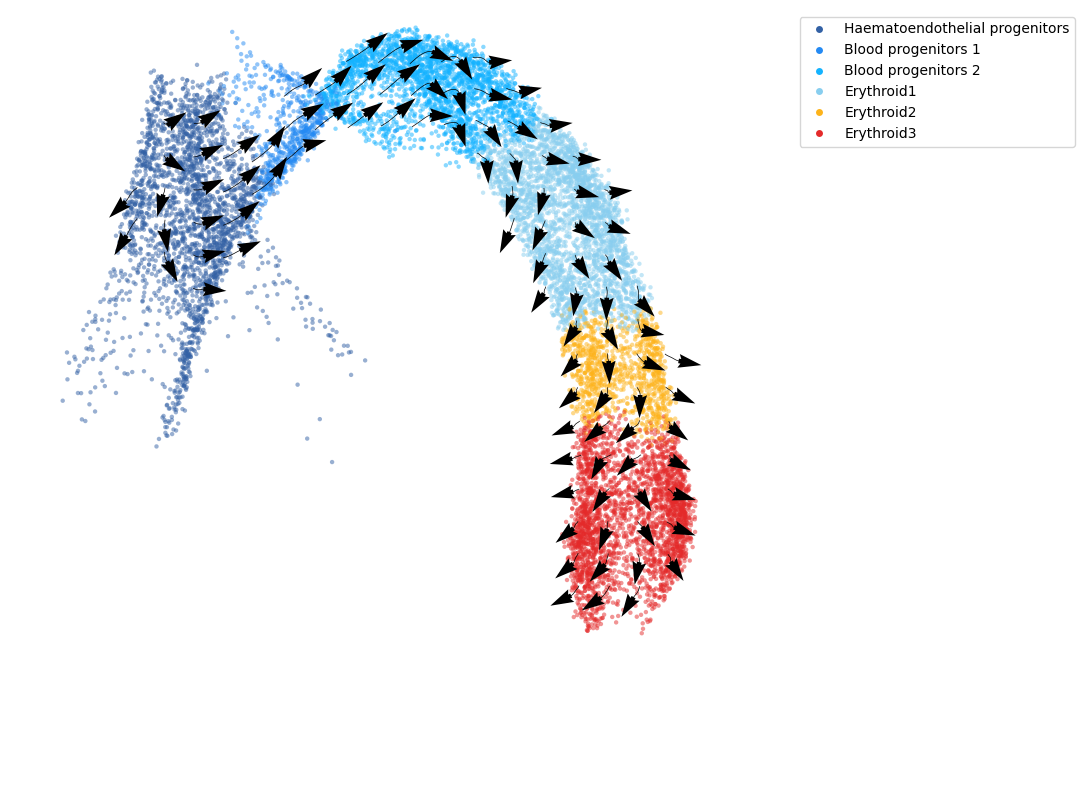

In [11]:
# plot cell velocity
fig, ax = plt.subplots(figsize=(10,10))
cdplt.scatter_cell(ax,
                   cellDancer_df,
                   colors=colormap.colormap_erythroid,
                   alpha=0.5,
                   s=10,
                   velocity=True,
                   legend='on',
                   min_mass=15,
                   arrow_grid=(20,20),
                   custom_xlim=[-6,13],
                   custom_ylim=[2,16], )
ax.axis('off')
plt.show()

In [12]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,Rbms2,0.038103,0.487043,0.036075,0.465511,0.019075,0.072630,0.265758,0.063194,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN
1,1,Rbms2,0.068753,0.475556,0.063721,0.474569,0.025291,0.073081,0.264805,0.063194,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN
2,2,Rbms2,0.047554,0.616871,0.044335,0.587504,0.017350,0.069651,0.267823,0.063194,cell_385,Blood progenitors 2,2.351203,15.267069,2,NaN,NaN
3,3,Rbms2,0.007280,0.306850,0.008928,0.283413,0.018062,0.076539,0.263122,0.063194,cell_393,Blood progenitors 2,5.899098,14.388825,3,NaN,NaN
4,4,Rbms2,0.050115,0.525755,0.046806,0.507668,0.020151,0.071801,0.266157,0.063194,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172601,12324,Smarca2,0.006268,0.013540,0.008323,0.014300,0.021040,0.137554,0.274898,0.071164,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN
172602,12325,Smarca2,0.011318,0.004068,0.012534,0.009087,0.022499,0.137459,0.274316,0.071164,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN
172603,12326,Smarca2,0.006760,0.015051,0.008719,0.015789,0.021087,0.137503,0.274937,0.071164,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN
172604,12327,Smarca2,0.000000,0.000000,0.003263,0.000000,0.020238,0.138108,0.274622,0.071164,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN


Pseudo random number generator seeds are set to:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Generating Trajectories: 100%|██████████| 9510/9510 [00:03<00:00, 2401.22it/s]


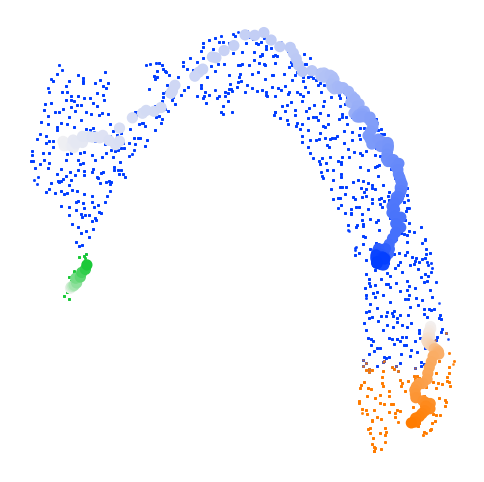

There are 3 clusters.
[0 1 2]
--- 249.61897897720337 seconds ---


In [13]:
import random
# set parameters
dt = 0.05
t_total = {dt:int(10/dt)}
n_repeats = 10

# estimate pseudotime
cellDancer_df = cd.pseudo_time(cellDancer_df=cellDancer_df,
                               grid=(30,30),
                               dt=dt,
                               t_total=t_total[dt],
                               n_repeats=n_repeats,
                               speed_up=(100,100),
                               n_paths = 3,
                               plot_long_trajs=True,
                               psrng_seeds_diffusion=[i for i in range(n_repeats)],
                               n_jobs=8)

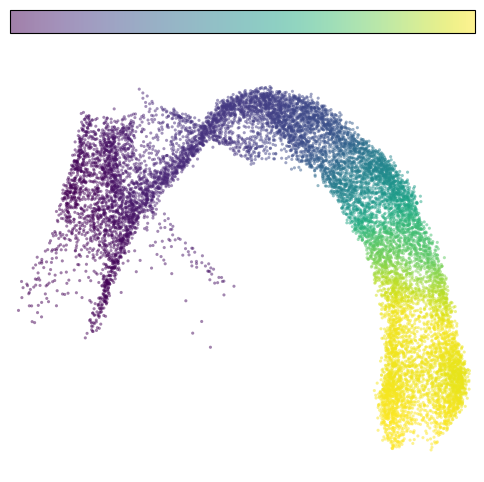

In [14]:
# plot pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

<AxesSubplot:>

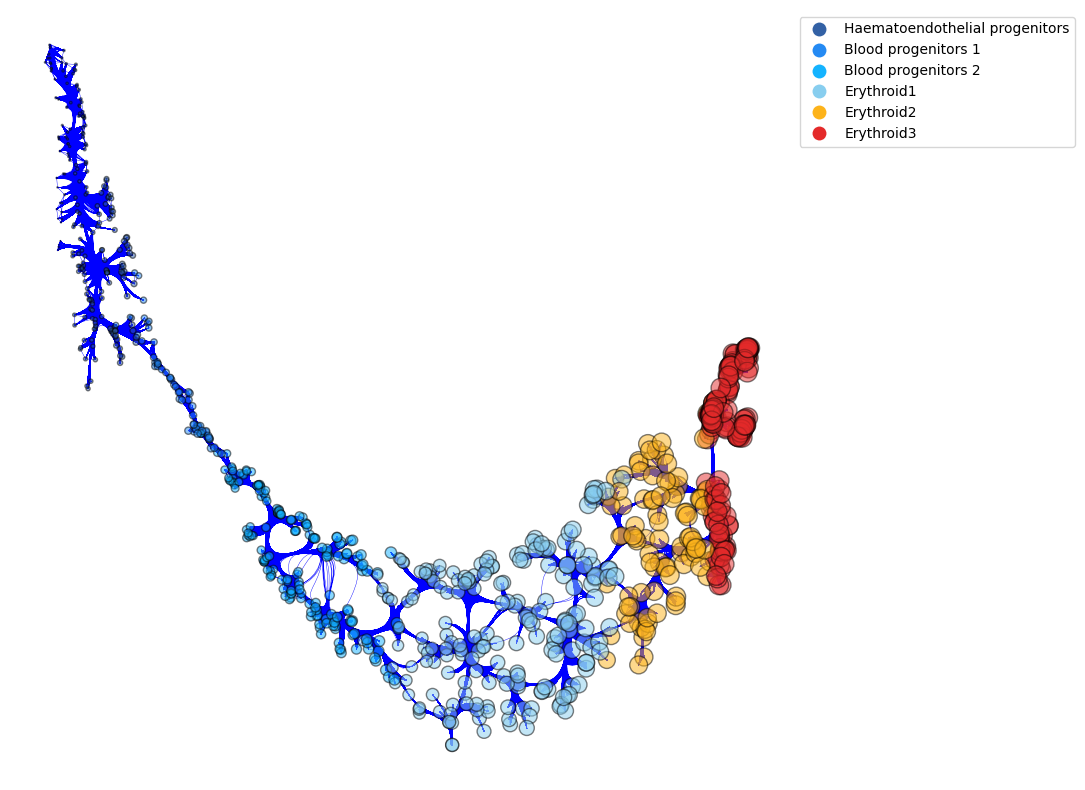

In [15]:
fig, ax= plt.subplots(figsize=(10,10))

cdplt.PTO_Graph(ax,
                cellDancer_df,
                node_layout='forcedirected',
                PRNG_SEED=10,
                use_edge_bundling=True,
                node_colors=colormap.colormap_erythroid,
                edge_length=3,
                node_sizes='pseudotime',
                colorbar='on',
                legend='on')

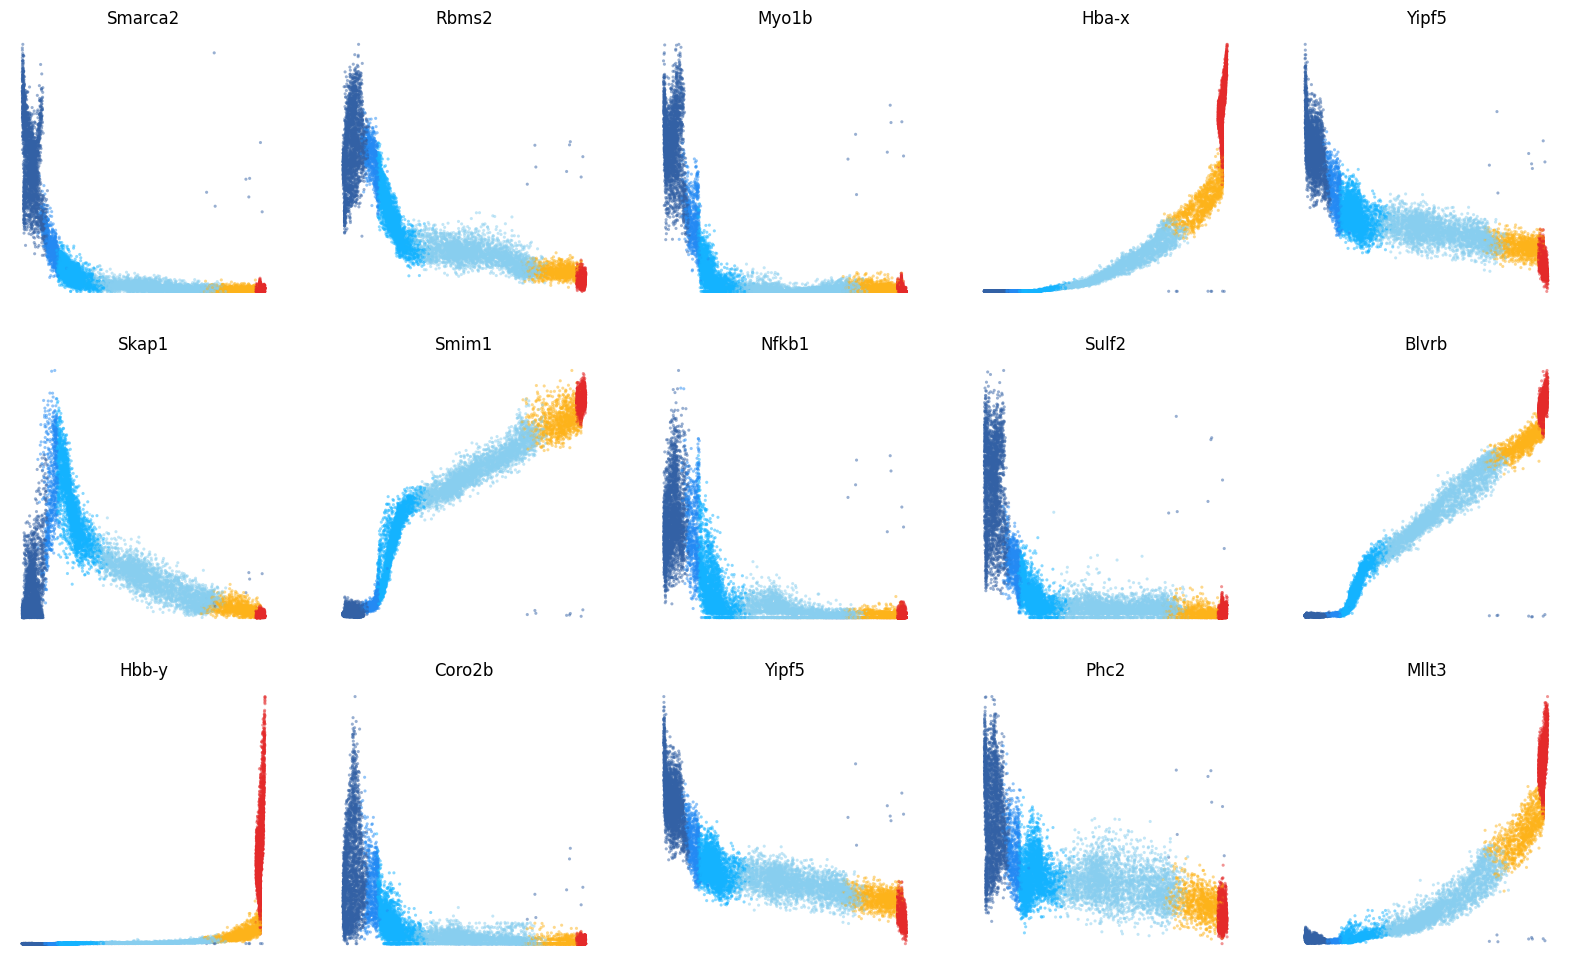

In [16]:
ncols=5
height=math.ceil(len(gene_list)/ncols)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5,
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')